In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


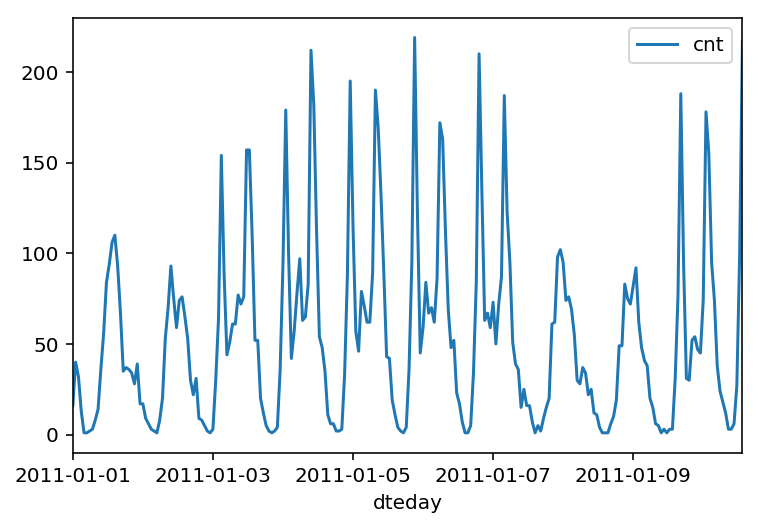

In [5]:

rides[:24*10].plot(x='dteday', y='cnt')

In [6]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [8]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [9]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [19]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = lambda x: 1/(1+np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        print("inputs:",inputs,"targets:",targets)
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)# signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs # signals from final output layer
        print("hidden_inputs:", hidden_inputs," hidden_outputs:", hidden_outputs, "final_inputs:", final_inputs," final_outputs:",final_outputs)
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        # TODO: Backpropagated error
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)
        hidden_grad = hidden_outputs * (1-hidden_outputs)
        print("output_errors:",output_errors, " hidden_errors",hidden_errors, " hidden_grad:", hidden_grad)
      
        print ("weights_hidden_to_output update:", np.dot(output_errors, hidden_outputs.T) )
        # TODO: Update the weights
        self.weights_hidden_to_output += self.lr * np.dot(output_errors, hidden_outputs.T) # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * np.dot(hidden_errors * hidden_grad, inputs.T) # update input-to-hidden weights with gradient descent step
        print("weights_hidden_to_output",self.weights_hidden_to_output)
        print("weights_input_to_hidden",self.weights_input_to_hidden)
        
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

In [20]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [18]:
import sys

### Set the hyperparameters here ###
epochs = 10000
learning_rate = 0.003
hidden_nodes = 19
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)


/Users/dc/anaconda/envs/tf35/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()
/Users/dc/anaconda/envs/tf35/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


inputs: [[ 1.        ]
 [ 0.        ]
 [ 1.26203639]
 [-0.24479801]
 [-0.45608552]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]] targets: [[-0.68065892]]
hidden_inputs: [[ 0.33406515]
 [ 0.58983108]
 [-0.42397991]
 [ 0.1195368 ]
 [-1.65131765]
 [-0.40998137]
 [ 1.12480715]
 [-0.0

 [ 0.31039652]] final_inputs: [[-2.51630684]]  final_outputs: [[-2.51630684]]
output_errors: [[ 1.53242984]]  hidden_errors [[ 0.34259141]
 [ 1.76891241]
 [ 3.24848071]
 [-2.86640081]
 [-0.70002266]
 [-5.37290155]
 [-1.62568654]
 [ 1.72251537]
 [-0.962406  ]
 [ 0.33561713]
 [-0.41069419]
 [ 0.31028193]
 [ 1.8354637 ]
 [-1.76685465]
 [ 1.83156179]
 [-0.09885741]
 [-0.33813377]
 [-3.31330667]
 [-0.85000035]]  hidden_grad: [[ 0.23895474]
 [ 0.23507955]
 [ 0.22505738]
 [ 0.21970614]
 [ 0.24946693]
 [ 0.23913137]
 [ 0.24585839]
 [ 0.18450679]
 [ 0.24363914]
 [ 0.17845505]
 [ 0.24624576]
 [ 0.24650296]
 [ 0.24110573]
 [ 0.24740912]
 [ 0.18700525]
 [ 0.24551042]
 [ 0.19041424]
 [ 0.24148553]
 [ 0.21405052]]
weights_hidden_to_output update: [[ 0.92726786  0.95340011  1.00823511  1.03293636  0.80159622  0.92597487
   0.86483502  0.37404097  0.64399594  0.35632229  0.86010967  0.85683641
   0.91073751  0.84421672  1.15083572  0.86889433  0.39214581  0.90761814
   0.47566089]]
weights_hidden_to_o

 [ 0.07758558]]  hidden_grad: [[ 0.24242402]
 [ 0.24923038]
 [ 0.24251166]
 [ 0.24969283]
 [ 0.24137418]
 [ 0.1872425 ]
 [ 0.24231667]
 [ 0.22913823]
 [ 0.21281799]
 [ 0.23902643]
 [ 0.24994639]
 [ 0.23551275]
 [ 0.14820374]
 [ 0.23755625]
 [ 0.21811132]
 [ 0.2497801 ]
 [ 0.24990692]
 [ 0.13051144]
 [ 0.2151015 ]]
weights_hidden_to_output update: [[-0.06342575 -0.07253322 -0.09008485 -0.07410227 -0.06252953 -0.03831802
  -0.09025679 -0.09897774 -0.04717823 -0.06070498 -0.07791858 -0.05830774
  -0.02779097 -0.09392707 -0.10422092 -0.07907162 -0.07827583 -0.02370308
  -0.04810206]]
weights_hidden_to_output [[ 0.28163279  1.20853198  2.16227114 -1.82453811 -0.41809717 -3.45760695
  -1.00152616  1.16980269 -0.58322613  0.27409944 -0.21074923  0.24495658
   1.23539318 -1.09434896  1.25490848 -0.00742751 -0.17498912 -2.11652918
  -0.50529774]]
weights_input_to_hidden [[ 0.05429143  0.24294585  0.1078781  ...,  0.13248562  0.29092895
   0.12214346]
 [ 0.16170677  0.01381452  0.0104126  ...,  

weights_hidden_to_output [[ 0.3187977   1.24311921  2.19907289 -1.79013526 -0.38988848 -3.42865875
  -0.95861728  1.20744787 -0.55359932  0.31592618 -0.17225015  0.27481241
   1.26124488 -1.0597248   1.29626459  0.0238517  -0.13580093 -2.09079362
  -0.47107059]]
weights_input_to_hidden [[ 0.05726007  0.24294585  0.11071634 ...,  0.13272505  0.29201657
   0.12271976]
 [ 0.17409579  0.01381452  0.02210676 ...,  0.13606816 -0.25035233
   0.51015399]
 [ 0.00842711 -0.01537326 -0.18357112 ...,  0.06755612  0.28700651
  -0.21892721]
 ..., 
 [-0.22887256  0.09655372  0.31902894 ...,  0.07731238  0.09658576
   0.02890265]
 [ 0.32406014 -0.04016759 -0.2837552  ..., -0.16598667 -0.24452601
   0.16246395]
 [ 0.161437   -0.32298709 -0.1353105  ..., -0.19028084  0.02188379
  -0.43568035]]
inputs: [[ 1.        ]
 [ 0.        ]
 [ 0.8465731 ]
 [-0.81495348]
 [ 0.51988127]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     

 [ 0.04883924]]  hidden_outputs: [[ 0.74817916]
 [ 0.33180791]
 [ 0.6144417 ]
 [ 0.61228627]
 [ 0.67665   ]
 [ 0.44608151]
 [ 0.57553673]
 [ 0.18088304]
 [ 0.51947519]
 [ 0.48714764]
 [ 0.68818417]
 [ 0.32470265]
 [ 0.71235135]
 [ 0.24491373]
 [ 0.59151502]
 [ 0.33732411]
 [ 0.60218999]
 [ 0.62557715]
 [ 0.51220738]] final_inputs: [[-1.5750312]]  final_outputs: [[-1.5750312]]
output_errors: [[ 0.56358892]]  hidden_errors [[ 0.18211572]
 [ 0.70164382]
 [ 1.23976478]
 [-1.00579469]
 [-0.21865076]
 [-1.92836985]
 [-0.53881473]
 [ 0.67970449]
 [-0.30973666]
 [ 0.17868411]
 [-0.09656092]
 [ 0.15616203]
 [ 0.71213187]
 [-0.59615398]
 [ 0.73034498]
 [ 0.01491427]
 [-0.07506787]
 [-1.17611065]
 [-0.2637869 ]]  hidden_grad: [[ 0.18840711]
 [ 0.22171142]
 [ 0.2369031 ]
 [ 0.23739179]
 [ 0.21879478]
 [ 0.2470928 ]
 [ 0.2442942 ]
 [ 0.14816436]
 [ 0.24962072]
 [ 0.24983482]
 [ 0.21458672]
 [ 0.21927084]
 [ 0.2049069 ]
 [ 0.184931  ]
 [ 0.241625  ]
 [ 0.22353655]
 [ 0.23955721]
 [ 0.23423038]
 [ 0.

 [ 0.32646031]]  hidden_grad: [[ 0.20152293]
 [ 0.23283406]
 [ 0.20900966]
 [ 0.22730723]
 [ 0.23466702]
 [ 0.19680552]
 [ 0.24878576]
 [ 0.24998893]
 [ 0.24341119]
 [ 0.24383665]
 [ 0.20487614]
 [ 0.248459  ]
 [ 0.23328633]
 [ 0.21950383]
 [ 0.20580915]
 [ 0.2419043 ]
 [ 0.22903564]
 [ 0.24588791]
 [ 0.23006509]]
weights_hidden_to_output update: [[-0.51129541 -0.2619618  -0.4987189  -0.46192913 -0.44289171 -0.19123529
  -0.37971918 -0.35261748 -0.29735144 -0.41071677 -0.50579229 -0.38284983
  -0.26319535 -0.23099856 -0.50422499 -0.29110051 -0.25218432 -0.40050654
  -0.25473997]]
weights_hidden_to_output [[ 0.33048929  1.25274731  2.20387904 -1.78080864 -0.38727937 -3.4126817
  -0.94682274  1.21338335 -0.54227765  0.32492983 -0.16415009  0.28328479
   1.26872997 -1.04856815  1.30524313  0.03669299 -0.12563847 -2.08107228
  -0.46059347]]
weights_input_to_hidden [[ 0.05790279  0.24255291  0.11114846 ...,  0.13319709  0.29269498
   0.12353706]
 [ 0.17625161  0.01184617  0.02220033 ...,  0

 [-0.00676898]]  hidden_outputs: [[ 0.39805168]
 [ 0.63397491]
 [ 0.55644769]
 [ 0.41923102]
 [ 0.20757686]
 [ 0.37559401]
 [ 0.44048582]
 [ 0.5942966 ]
 [ 0.44288369]
 [ 0.52047351]
 [ 0.63286001]
 [ 0.44514779]
 [ 0.22108207]
 [ 0.50266985]
 [ 0.52212504]
 [ 0.55577789]
 [ 0.52851222]
 [ 0.38417076]
 [ 0.49830776]] final_inputs: [[-0.16637242]]  final_outputs: [[-0.16637242]]
output_errors: [[ 2.17608485]]  hidden_errors [[ 0.76722099]
 [ 2.76808779]
 [ 4.83891658]
 [-3.83941757]
 [-0.81220658]
 [-7.38539055]
 [-2.0123658 ]
 [ 2.68220085]
 [-1.13626711]
 [ 0.75140996]
 [-0.30910627]
 [ 0.65696219]
 [ 2.79246413]
 [-2.23746927]
 [ 2.8898807 ]
 [ 0.12348794]
 [-0.22924098]
 [-4.49456293]
 [-0.95812871]]  hidden_grad: [[ 0.23960654]
 [ 0.23205072]
 [ 0.24681366]
 [ 0.24347637]
 [ 0.16448871]
 [ 0.23452315]
 [ 0.24645806]
 [ 0.24110815]
 [ 0.24673773]
 [ 0.24958084]
 [ 0.23234822]
 [ 0.24699123]
 [ 0.17220479]
 [ 0.24999287]
 [ 0.24951048]
 [ 0.24688883]
 [ 0.24918705]
 [ 0.23658359]
 [ 

weights_hidden_to_output update: [[ 0.04038783  0.04336737  0.04891121  0.04294656  0.04602791  0.02664675
   0.08162241  0.06543025  0.02360094  0.07050209  0.04846201  0.08200769
   0.04848979  0.08253854  0.06948887  0.08292269  0.04537208  0.05125169
   0.08954046]]
weights_hidden_to_output [[ 0.35974327  1.28277529  2.23268985 -1.75768862 -0.3698312  -3.38543373
  -0.91388968  1.2440528  -0.51246814  0.35449889 -0.13205354  0.31074907
   1.28837775 -1.01957069  1.33854275  0.06651594 -0.09414831 -2.06040009
  -0.43230338]]
weights_input_to_hidden [[ 0.05960794  0.24235175  0.11503428 ...,  0.13339569  0.29359819
   0.12524798]
 [ 0.18211436  0.01069344  0.03606208 ...,  0.13811704 -0.24412431
   0.51938056]
 [ 0.02390292 -0.01974965 -0.15905572 ...,  0.06998162  0.29818238
  -0.20132294]
 ..., 
 [-0.22961415  0.09686157  0.31759321 ...,  0.077092    0.09598376
   0.02796132]
 [ 0.31429013 -0.03542358 -0.2984279  ..., -0.16769728 -0.25411538
   0.14727336]
 [ 0.15847257 -0.32184085

 [ 1.        ]] targets: [[ 1.07800596]]
hidden_inputs: [[-0.02815002]
 [ 0.69087666]
 [ 0.63153661]
 [-0.18690596]
 [ 0.28101744]
 [-0.58669573]
 [ 0.22430057]
 [ 0.56636584]
 [ 0.40691225]
 [ 0.73019533]
 [ 0.73779141]
 [-0.09758372]
 [-0.51157264]
 [-0.14303614]
 [ 0.94430433]
 [-0.68567304]
 [ 0.14271901]
 [-0.52131933]
 [-0.62359123]]  hidden_outputs: [[ 0.49296296]
 [ 0.66616191]
 [ 0.6528378 ]
 [ 0.45340906]
 [ 0.56979565]
 [ 0.35739337]
 [ 0.55584122]
 [ 0.63792419]
 [ 0.60034726]
 [ 0.67484814]
 [ 0.67651271]
 [ 0.47562341]
 [ 0.37482494]
 [ 0.46430181]
 [ 0.71996829]
 [ 0.33499632]
 [ 0.53561931]
 [ 0.37254378]
 [ 0.34896512]] final_inputs: [[ 0.54721099]]  final_outputs: [[ 0.54721099]]
output_errors: [[ 0.53079496]]  hidden_errors [[ 0.19011386]
 [ 0.67990489]
 [ 1.18275043]
 [-0.93336264]
 [-0.19938248]
 [-1.79582468]
 [-0.48711462]
 [ 0.65850954]
 [-0.27299087]
 [ 0.18590736]
 [-0.07190789]
 [ 0.16266861]
 [ 0.68355397]
 [-0.54252301]
 [ 0.70778391]
 [ 0.03514658]
 [-0.05

 [ 0.        ]] targets: [[-0.5207803]]
hidden_inputs: [[ 1.70131074]
 [ 0.63648359]
 [ 0.45270818]
 [-0.45698078]
 [ 0.23931041]
 [-0.03509032]
 [ 0.06536256]
 [-0.1256116 ]
 [ 0.32612582]
 [ 0.50082841]
 [ 0.36851945]
 [-0.69363587]
 [ 0.21992392]
 [-0.53295976]
 [ 0.98021774]
 [-0.06076523]
 [-0.57815713]
 [ 0.39174627]
 [-0.85645246]]  hidden_outputs: [[ 0.84570585]
 [ 0.65395814]
 [ 0.61128293]
 [ 0.38770231]
 [ 0.5595437 ]
 [ 0.49122832]
 [ 0.51633482]
 [ 0.46863833]
 [ 0.58081643]
 [ 0.62265399]
 [ 0.59110118]
 [ 0.33322475]
 [ 0.55476044]
 [ 0.36982684]
 [ 0.72715142]
 [ 0.48481336]
 [ 0.35935675]
 [ 0.59670301]
 [ 0.29808106]] final_inputs: [[-0.12328263]]  final_outputs: [[-0.12328263]]
output_errors: [[-0.39749767]]  hidden_errors [[-0.13978058]
 [-0.50567418]
 [-0.88199541]
 [ 0.70051656]
 [ 0.1517518 ]
 [ 1.3442584 ]
 [ 0.36712872]
 [-0.48739096]
 [ 0.2056673 ]
 [-0.13542542]
 [ 0.05668396]
 [-0.11849386]
 [-0.51140629]
 [ 0.40944789]
 [-0.52546277]
 [-0.02358432]
 [ 0.039

weights_input_to_hidden [[ 0.05899229  0.24227413  0.1128433  ...,  0.13300998  0.29309802
   0.12551834]
 [ 0.18007303  0.01040006  0.02638479 ...,  0.1368525  -0.24663623
   0.52002949]
 [ 0.02124095 -0.02026487 -0.17655934 ...,  0.06878761  0.2938033
  -0.19984923]
 ..., 
 [-0.22947301  0.09688559  0.31834096 ...,  0.07719059  0.09617756
   0.02789013]
 [ 0.31889902 -0.03511798 -0.28218539 ..., -0.16622937 -0.2506829
   0.14572103]
 [ 0.15930111 -0.32173789 -0.13702621 ..., -0.19055654  0.02016904
  -0.43944316]]
inputs: [[ 0.        ]
 [ 0.        ]
 [-1.75007248]
 [ 1.56933303]
 [-1.55384381]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.

 [-0.34799958]]  hidden_grad: [[ 0.22314674]
 [ 0.20700937]
 [ 0.23566274]
 [ 0.22384514]
 [ 0.17811465]
 [ 0.24954201]
 [ 0.24662694]
 [ 0.24992714]
 [ 0.21262297]
 [ 0.23852201]
 [ 0.21522986]
 [ 0.24341754]
 [ 0.16150843]
 [ 0.24416198]
 [ 0.23987344]
 [ 0.24581287]
 [ 0.24872119]
 [ 0.24397091]
 [ 0.22324348]]
weights_hidden_to_output update: [[ 0.53623305  0.57134718  0.307152    0.27323801  0.18730288  0.4211554
   0.45078113  0.39697434  0.56003043  0.49040659  0.55448623  0.33833551
   0.16358696  0.34215243  0.48515262  0.45613639  0.37498413  0.34115056
   0.27174405]]
weights_hidden_to_output [[ 0.35444605  1.27915305  2.22633337 -1.75404168 -0.38097016 -3.37315996
  -0.91457414  1.2309939  -0.51100448  0.34920888 -0.13108281  0.30776264
   1.28963257 -1.02117114  1.32905348  0.06721233 -0.0907085  -2.05725592
  -0.43001678]]
weights_input_to_hidden [[ 0.05936969  0.2420114   0.113237   ...,  0.13286008  0.29309358
   0.12684134]
 [ 0.18127684  0.00942709  0.02756956 ...,  0

 [ 0.3897103 ]] final_inputs: [[-1.0110871]]  final_outputs: [[-1.0110871]]
output_errors: [[ 0.31940207]]  hidden_errors [[ 0.11776497]
 [ 0.41289191]
 [ 0.71381346]
 [-0.55736658]
 [-0.11972514]
 [-1.07296465]
 [-0.28723004]
 [ 0.3958215 ]
 [-0.16081187]
 [ 0.1149559 ]
 [-0.0378275 ]
 [ 0.10069246]
 [ 0.41527561]
 [-0.32285238]
 [ 0.42736986]
 [ 0.02577866]
 [-0.02469467]
 [-0.65427393]
 [-0.13249591]]  hidden_grad: [[ 0.20289852]
 [ 0.24501051]
 [ 0.23897399]
 [ 0.24795343]
 [ 0.248913  ]
 [ 0.24438695]
 [ 0.23572773]
 [ 0.18611248]
 [ 0.22969611]
 [ 0.1753662 ]
 [ 0.24944011]
 [ 0.20624909]
 [ 0.22829474]
 [ 0.23335648]
 [ 0.16783966]
 [ 0.24999433]
 [ 0.24144104]
 [ 0.24120825]
 [ 0.23783618]]
weights_hidden_to_output update: [[ 0.22902047  0.18226241  0.19323979  0.17415048  0.14917045  0.18363073
   0.19785892  0.07896903  0.20521318  0.07244298  0.15214336  0.0928926
   0.2067576   0.11849505  0.25125325  0.15894072  0.13015166  0.18964956
   0.12447428]]
weights_hidden_to_outp

output_errors: [[-0.36759508]]  hidden_errors [[-0.13383861]
 [-0.47402444]
 [-0.81946089]
 [ 0.64287124]
 [ 0.13940086]
 [ 1.23457579]
 [ 0.3313219 ]
 [-0.45334335]
 [ 0.1863147 ]
 [-0.1301424 ]
 [ 0.04531213]
 [-0.11430428]
 [-0.4768516 ]
 [ 0.37269708]
 [-0.48986248]
 [-0.02776478]
 [ 0.02909752]
 [ 0.7550274 ]
 [ 0.15418872]]  hidden_grad: [[ 0.24505734]
 [ 0.24834547]
 [ 0.24230724]
 [ 0.24423932]
 [ 0.24376774]
 [ 0.1626838 ]
 [ 0.24964996]
 [ 0.19186767]
 [ 0.18544285]
 [ 0.24988417]
 [ 0.22551463]
 [ 0.24847277]
 [ 0.23495919]
 [ 0.21603314]
 [ 0.19406369]
 [ 0.24327178]
 [ 0.24026424]
 [ 0.19319118]
 [ 0.24679569]]
weights_hidden_to_output update: [[-0.20964097 -0.16884528 -0.2160387  -0.2116977  -0.21281721 -0.07517571
  -0.17692009 -0.27242709 -0.09039862 -0.17984129 -0.12627699 -0.16943201
  -0.13871532 -0.1160494  -0.09685815 -0.15364529 -0.22006812 -0.09618272
  -0.16298921]]
weights_hidden_to_output [[ 0.36346357  1.28902225  2.22860069 -1.74949213 -0.37986241 -3.3587465

output_errors: [[-0.72861266]]  hidden_errors [[-0.2642692 ]
 [-0.94064954]
 [-1.62339051]
 [ 1.27439682]
 [ 0.27793853]
 [ 2.44564963]
 [ 0.65424606]
 [-0.89989104]
 [ 0.37004392]
 [-0.25970972]
 [ 0.08865732]
 [-0.22860736]
 [-0.94407509]
 [ 0.73620611]
 [-0.9714812 ]
 [-0.05693515]
 [ 0.05596583]
 [ 1.49751433]
 [ 0.30565229]]  hidden_grad: [[ 0.21968131]
 [ 0.24767783]
 [ 0.24470452]
 [ 0.24886825]
 [ 0.22400419]
 [ 0.15705554]
 [ 0.2370443 ]
 [ 0.23281156]
 [ 0.19691691]
 [ 0.21702752]
 [ 0.24349647]
 [ 0.25      ]
 [ 0.22133733]
 [ 0.24434845]
 [ 0.24985855]
 [ 0.237516  ]
 [ 0.24875556]
 [ 0.2338853 ]
 [ 0.24475849]]
weights_hidden_to_output update: [[-0.23743838 -0.32919531 -0.41732749 -0.38881798 -0.24683054 -0.14217569
  -0.4472393  -0.45983087 -0.19643567 -0.49661019 -0.42306491 -0.36429256
  -0.24095182 -0.30953156 -0.37297186 -0.44571556 -0.33860338 -0.27181355
  -0.31155605]]
weights_hidden_to_output [[ 0.36198958  1.29002696  2.22680497 -1.75023957 -0.38220316 -3.3570105

output_errors: [[-0.62205759]]  hidden_errors [[-0.22310061]
 [-0.80156859]
 [-1.38280183]
 [ 1.09130079]
 [ 0.24002459]
 [ 2.08798389]
 [ 0.55867597]
 [-0.76796439]
 [ 0.3160037 ]
 [-0.2220615 ]
 [ 0.07698041]
 [-0.19482125]
 [-0.80499823]
 [ 0.62927563]
 [-0.82776382]
 [-0.04725913]
 [ 0.04787403]
 [ 1.28108741]
 [ 0.26138157]]  hidden_grad: [[ 0.17672846]
 [ 0.24447994]
 [ 0.24778885]
 [ 0.21736555]
 [ 0.15114433]
 [ 0.2267375 ]
 [ 0.24087046]
 [ 0.24776465]
 [ 0.2224476 ]
 [ 0.22034208]
 [ 0.19543532]
 [ 0.23509358]
 [ 0.21831037]
 [ 0.24997726]
 [ 0.16095749]
 [ 0.22117543]
 [ 0.19316628]
 [ 0.2480431 ]
 [ 0.24779256]]
weights_hidden_to_output update: [[-0.4794118  -0.35724587 -0.28177787 -0.19865405 -0.11544567 -0.21615226
  -0.37046554 -0.28161826 -0.41428361 -0.41815628 -0.45633575 -0.23508062
  -0.20029271 -0.30806233 -0.49665073 -0.41664048 -0.16273136 -0.33854666
  -0.34025515]]
weights_hidden_to_output [[ 0.35721121  1.28750443  2.22210291 -1.75493641 -0.38620224 -3.3572249

 [ 0.63141589]]  hidden_grad: [[ 0.23099311]
 [ 0.2499488 ]
 [ 0.20595176]
 [ 0.24910642]
 [ 0.23865406]
 [ 0.19862486]
 [ 0.24999285]
 [ 0.2493104 ]
 [ 0.24896481]
 [ 0.21145533]
 [ 0.24455274]
 [ 0.24175598]
 [ 0.23256571]
 [ 0.2468653 ]
 [ 0.19505248]
 [ 0.24999977]
 [ 0.24310375]
 [ 0.2379062 ]
 [ 0.16186925]]
weights_hidden_to_output update: [[-0.95555146 -0.75974175 -1.06342762 -0.79380362 -0.90859052 -0.40947446
  -0.74501834 -0.7883617  -0.79722142 -0.45491452 -0.63845865 -0.61300529
  -0.55122235 -0.83289587 -1.10017789 -0.74973848 -0.62461959 -0.58427994
  -0.30430062]]
weights_hidden_to_output [[ 0.35126983  1.28438279  2.21914132 -1.75842131 -0.3915898  -3.35774421
  -0.90325223  1.23095876 -0.51150295  0.35461649 -0.1269613   0.31191744
   1.29006253 -1.01648655  1.32604946  0.07031294 -0.0813724  -2.06354547
  -0.42240605]]
weights_input_to_hidden [[ 0.05949217  0.24180631  0.11613711 ...,  0.13176346  0.29248225
   0.12861351]
 [ 0.1800865   0.0086119   0.03773329 ...,  

  -0.41775625]]
weights_input_to_hidden [[ 0.05961274  0.24180631  0.11609367 ...,  0.13220496  0.29256297
   0.12857294]
 [ 0.18024946  0.0086119   0.03689346 ...,  0.13347971 -0.24868069
   0.53145956]
 [ 0.02307366 -0.02305573 -0.15826316 ...,  0.06369803  0.29074749
  -0.17943794]
 ..., 
 [-0.22961701  0.09701071  0.31755534 ...,  0.07737467  0.09630051
   0.0270895 ]
 [ 0.32433676 -0.03259166 -0.28871627 ..., -0.16163674 -0.24811822
   0.12960007]
 [ 0.15901286 -0.32113142 -0.14053544 ..., -0.1896743   0.02077639
  -0.44327817]]
inputs: [[ 1.        ]
 [ 0.        ]
 [ 0.53497563]
 [-1.02228274]
 [-0.82146002]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [

 [ 0.51911201]] final_inputs: [[-0.00891236]]  final_outputs: [[-0.00891236]]
output_errors: [[-0.88675574]]  hidden_errors [[-0.32579547]
 [-1.15102048]
 [-1.97698365]
 [ 1.54831494]
 [ 0.34179691]
 [ 2.96549662]
 [ 0.79007594]
 [-1.10043812]
 [ 0.44587666]
 [-0.32070571]
 [ 0.10411358]
 [-0.28434052]
 [-1.1571568 ]
 [ 0.89040839]
 [-1.18817648]
 [-0.07556922]
 [ 0.0600916 ]
 [ 1.82259628]
 [ 0.36373204]]  hidden_grad: [[ 0.18829617]
 [ 0.24665634]
 [ 0.22795188]
 [ 0.20844115]
 [ 0.2338594 ]
 [ 0.23932023]
 [ 0.24491719]
 [ 0.24787931]
 [ 0.23696685]
 [ 0.22226344]
 [ 0.19488563]
 [ 0.2499263 ]
 [ 0.20130295]
 [ 0.24585762]
 [ 0.14171615]
 [ 0.24999911]
 [ 0.17439692]
 [ 0.22270134]
 [ 0.24963473]]
weights_hidden_to_output update: [[-0.66365027 -0.49465398 -0.57504875 -0.26260395 -0.33071939 -0.35173791
  -0.50659809 -0.48421377 -0.54461241 -0.59106081 -0.65155664 -0.4509905
  -0.24769386 -0.50045065 -0.73517825 -0.44421533 -0.19955539 -0.58989037
  -0.46032556]]
weights_hidden_to_ou

 [ 0.484469  ]] final_inputs: [[ 0.22988925]]  final_outputs: [[ 0.22988925]]
output_errors: [[ 0.44015056]]  hidden_errors [[ 0.15816799]
 [ 0.56862411]
 [ 0.9779307 ]
 [-0.77039641]
 [-0.17168475]
 [-1.47253643]
 [-0.39509525]
 [ 0.54319583]
 [-0.22443882]
 [ 0.15582452]
 [-0.0554625 ]
 [ 0.13812134]
 [ 0.57304354]
 [-0.44475037]
 [ 0.58546871]
 [ 0.03473994]
 [-0.03104135]
 [-0.90791815]
 [-0.18309644]]  hidden_grad: [[ 0.23977433]
 [ 0.24995706]
 [ 0.24999926]
 [ 0.2495333 ]
 [ 0.17527934]
 [ 0.20198337]
 [ 0.24548629]
 [ 0.2387733 ]
 [ 0.18514436]
 [ 0.22688175]
 [ 0.2236392 ]
 [ 0.24832819]
 [ 0.23818811]
 [ 0.21699767]
 [ 0.24737913]
 [ 0.20625499]
 [ 0.2417206 ]
 [ 0.22225728]
 [ 0.24975879]]
weights_hidden_to_output update: [[ 0.17556635  0.22295953  0.22045418  0.21056657  0.09975977  0.12362642
   0.24964642  0.17343863  0.10798314  0.28699879  0.14861239  0.23807208
   0.26791195  0.30003541  0.24260855  0.31213412  0.18002545  0.14676316
   0.2132393 ]]
weights_hidden_to_o

  -0.4240198 ]]
weights_input_to_hidden [[ 0.05985135  0.24161432  0.11640897 ...,  0.13243564  0.29191288
   0.12803616]
 [ 0.17956121  0.00777655  0.03752214 ...,  0.13384101 -0.25166247
   0.53020953]
 [ 0.02360121 -0.02379492 -0.15634978 ...,  0.06511409  0.28678149
  -0.18188411]
 ..., 
 [-0.22961432  0.09705241  0.31746253 ...,  0.07733906  0.09646359
   0.02718509]
 [ 0.32482412 -0.03164524 -0.28924208 ..., -0.16253729 -0.24388829
   0.13255337]
 [ 0.15930146 -0.32088476 -0.14068584 ..., -0.18990832  0.02167619
  -0.44279451]]
inputs: [[ 0.        ]
 [ 0.        ]
 [ 1.15817056]
 [ 0.16986051]
 [ 0.51988127]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [

 [ 0.39101051]] final_inputs: [[-0.66693501]]  final_outputs: [[-0.66693501]]
output_errors: [[-0.28386366]]  hidden_errors [[-0.09897013]
 [-0.36393572]
 [-0.62813104]
 [ 0.49895062]
 [ 0.11331139]
 [ 0.9494519 ]
 [ 0.25652744]
 [-0.34617844]
 [ 0.14682638]
 [-0.0981712 ]
 [ 0.03807605]
 [-0.08786392]
 [-0.3681461 ]
 [ 0.28822871]
 [-0.37580808]
 [-0.02144868]
 [ 0.02278759]
 [ 0.58612024]
 [ 0.11907988]]  hidden_grad: [[ 0.16567351]
 [ 0.24569931]
 [ 0.22641834]
 [ 0.24897758]
 [ 0.16615969]
 [ 0.24119852]
 [ 0.24151662]
 [ 0.24257532]
 [ 0.22492241]
 [ 0.21757643]
 [ 0.2491049 ]
 [ 0.2431123 ]
 [ 0.2357469 ]
 [ 0.24619805]
 [ 0.1684065 ]
 [ 0.24477261]
 [ 0.2105187 ]
 [ 0.2045823 ]
 [ 0.23812129]]
weights_hidden_to_output update: [[-0.22436306 -0.16054751 -0.18552284 -0.13285522 -0.22412509 -0.11530081
  -0.16807716 -0.11747227 -0.18688421 -0.19304587 -0.15042453 -0.11837337
  -0.10804238 -0.12442881 -0.22301628 -0.12140829 -0.0855284  -0.20242723
  -0.11099367]]
weights_hidden_to_o

 [ 0.        ]] targets: [[ 1.86637297]]
hidden_inputs: [[-1.09911901]
 [ 0.23033386]
 [ 1.1794628 ]
 [-0.13321083]
 [-0.03474343]
 [-0.64816671]
 [ 0.54299733]
 [ 1.05370102]
 [ 0.21578704]
 [ 1.20576154]
 [ 0.57934108]
 [ 0.21705561]
 [-0.52535548]
 [ 0.31577831]
 [ 1.51592377]
 [-1.27041448]
 [ 0.16710461]
 [-1.57060765]
 [-0.35901958]]  hidden_outputs: [[ 0.249905  ]
 [ 0.55733022]
 [ 0.7648512 ]
 [ 0.46674645]
 [ 0.49131502]
 [ 0.34340278]
 [ 0.6325094 ]
 [ 0.74148496]
 [ 0.5537384 ]
 [ 0.76954814]
 [ 0.64091578]
 [ 0.55405186]
 [ 0.3716008 ]
 [ 0.57829505]
 [ 0.81993745]
 [ 0.21918631]
 [ 0.54167921]
 [ 0.17212978]
 [ 0.41119692]] final_inputs: [[ 1.17766373]]  final_outputs: [[ 1.17766373]]
output_errors: [[ 0.68870924]]  hidden_errors [[ 0.24042978]
 [ 0.88456333]
 [ 1.52448449]
 [-1.20993802]
 [-0.27575238]
 [-2.3033735 ]
 [-0.62037093]
 [ 0.84309988]
 [-0.35634956]
 [ 0.24118927]
 [-0.09069579]
 [ 0.21518145]
 [ 0.89397076]
 [-0.69522466]
 [ 0.91471097]
 [ 0.05497939]
 [-0.05

 [ 0.57150028]] final_inputs: [[-0.30335035]]  final_outputs: [[-0.30335035]]
output_errors: [[ 0.48272817]]  hidden_errors [[ 0.16998492]
 [ 0.62289921]
 [ 1.07001489]
 [-0.84794829]
 [-0.1929999 ]
 [-1.61216832]
 [-0.4347289 ]
 [ 0.59266756]
 [-0.24775456]
 [ 0.16899877]
 [-0.06212001]
 [ 0.15143929]
 [ 0.62778993]
 [-0.48672042]
 [ 0.6423942 ]
 [ 0.03986296]
 [-0.03608433]
 [-0.99511824]
 [-0.19961204]]  hidden_grad: [[ 0.24477637]
 [ 0.24984404]
 [ 0.24643827]
 [ 0.19781343]
 [ 0.19734743]
 [ 0.23496599]
 [ 0.23972261]
 [ 0.23860514]
 [ 0.18448037]
 [ 0.24581181]
 [ 0.13235197]
 [ 0.24645838]
 [ 0.18037396]
 [ 0.24939023]
 [ 0.24929403]
 [ 0.20664315]
 [ 0.24996345]
 [ 0.17428368]
 [ 0.24488771]]
weights_hidden_to_output update: [[ 0.20647507  0.24739257  0.21255477  0.13108783  0.13059657  0.30055296
   0.29030185  0.18983443  0.11780111  0.21012373  0.075789    0.21263621
   0.36874034  0.25328434  0.25419024  0.34187923  0.23844586  0.10853372
   0.27587929]]
weights_hidden_to_o

 [-0.10247577]]  hidden_grad: [[ 0.23510478]
 [ 0.24863019]
 [ 0.23960374]
 [ 0.23973323]
 [ 0.14537345]
 [ 0.22129408]
 [ 0.24278594]
 [ 0.24170209]
 [ 0.24340299]
 [ 0.22768377]
 [ 0.21367494]
 [ 0.21739616]
 [ 0.23400641]
 [ 0.22747602]
 [ 0.17416091]
 [ 0.21354927]
 [ 0.22146879]
 [ 0.24883773]
 [ 0.23488306]]
weights_hidden_to_output update: [[ 0.15071372  0.13011084  0.14584765  0.09659379  0.0427733   0.08009328
   0.10056476  0.14321418  0.10146452  0.1573379   0.16732138  0.16489221
   0.09050253  0.15750598  0.18786676  0.16740119  0.0802184   0.11288349
   0.15093299]]
weights_hidden_to_output [[ 0.34146781  1.27578329  2.20205023 -1.76699246 -0.41179012 -3.34471744
  -0.91242761  1.21343629 -0.52299349  0.3351095  -0.14160481  0.30451775
   1.29383025 -1.02062625  1.31616949  0.07158644 -0.08671405 -2.06870612
  -0.42249898]]
weights_input_to_hidden [[ 0.06158734  0.24161432  0.1158496  ...,  0.13163231  0.291191
   0.12788064]
 [ 0.18637817  0.00777655  0.03583556 ...,  0.

 [ 0.34519811]] final_inputs: [[-0.51774797]]  final_outputs: [[-0.51774797]]
output_errors: [[ 0.09068962]]  hidden_errors [[ 0.03145409]
 [ 0.11634145]
 [ 0.20039587]
 [-0.15986581]
 [-0.03694762]
 [-0.30289819]
 [-0.08222206]
 [ 0.11057926]
 [-0.04693037]
 [ 0.0312212 ]
 [-0.01217614]
 [ 0.02798242]
 [ 0.11782589]
 [-0.09201306]
 [ 0.12003377]
 [ 0.00704334]
 [-0.00727313]
 [-0.18720123]
 [-0.03766873]]  hidden_grad: [[ 0.19739631]
 [ 0.24326763]
 [ 0.22781136]
 [ 0.2483957 ]
 [ 0.21521984]
 [ 0.24970823]
 [ 0.2496605 ]
 [ 0.24945258]
 [ 0.23108227]
 [ 0.24073836]
 [ 0.20653596]
 [ 0.22821939]
 [ 0.24995862]
 [ 0.23090092]
 [ 0.1545026 ]
 [ 0.2092331 ]
 [ 0.22469172]
 [ 0.24723601]
 [ 0.22603637]]
weights_hidden_to_output update: [[ 0.06614493  0.05278599  0.0588538   0.04897727  0.06225792  0.04689392
   0.04701582  0.04322294  0.05781842  0.03661708  0.06425181  0.03196061
   0.04592821  0.03281156  0.07337031  0.02703384  0.03091738  0.0501127
   0.03130589]]
weights_hidden_to_ou

hidden_inputs: [[ 0.77625376]
 [ 0.21629903]
 [ 0.80984147]
 [ 0.02925038]
 [-0.62060174]
 [-1.44870345]
 [-0.28378205]
 [ 0.09922958]
 [ 0.1044978 ]
 [-0.58986534]
 [ 0.68778586]
 [-0.31593347]
 [-0.66823629]
 [ 0.2008391 ]
 [ 1.29003891]
 [ 0.56712738]
 [-0.402158  ]
 [ 0.60645318]
 [-0.48803587]]  hidden_outputs: [[ 0.68487215]
 [ 0.55386491]
 [ 0.69207572]
 [ 0.50731207]
 [ 0.34964461]
 [ 0.19020119]
 [ 0.4295268 ]
 [ 0.52478706]
 [ 0.5261007 ]
 [ 0.35666575]
 [ 0.6654742 ]
 [ 0.42166711]
 [ 0.33889188]
 [ 0.55004168]
 [ 0.78415377]
 [ 0.63810007]
 [ 0.40079397]
 [ 0.6471313 ]
 [ 0.38035638]] final_inputs: [[ 0.33619654]]  final_outputs: [[ 0.33619654]]
output_errors: [[-1.3255866]]  hidden_errors [[-0.45097307]
 [-1.69167805]
 [-2.92022427]
 [ 2.34395364]
 [ 0.54579544]
 [ 4.43305771]
 [ 1.20827797]
 [-1.60714225]
 [ 0.69196848]
 [-0.44659552]
 [ 0.18619405]
 [-0.40348741]
 [-1.7183911 ]
 [ 1.35264761]
 [-1.74510636]
 [-0.09438918]
 [ 0.1140975 ]
 [ 2.73987073]
 [ 0.55778584]]  hi

 [ 0.3445378 ]] final_inputs: [[ 0.27316722]]  final_outputs: [[ 0.27316722]]
output_errors: [[-0.51278166]]  hidden_errors [[-0.17120385]
 [-0.6493761 ]
 [-1.1245995 ]
 [ 0.90956103]
 [ 0.21572703]
 [ 1.71580112]
 [ 0.46996144]
 [-0.61749641]
 [ 0.26853734]
 [-0.16657307]
 [ 0.07578908]
 [-0.15254549]
 [-0.66286638]
 [ 0.52834769]
 [-0.66935116]
 [-0.03236234]
 [ 0.04736762]
 [ 1.06202542]
 [ 0.22124547]]  hidden_grad: [[ 0.24397295]
 [ 0.24988677]
 [ 0.24003253]
 [ 0.24994402]
 [ 0.23278574]
 [ 0.21845398]
 [ 0.18110424]
 [ 0.21364576]
 [ 0.23284027]
 [ 0.22596116]
 [ 0.22559943]
 [ 0.23203803]
 [ 0.2253329 ]
 [ 0.24938583]
 [ 0.2290751 ]
 [ 0.24389818]
 [ 0.22328318]
 [ 0.18324265]
 [ 0.22583151]]
weights_hidden_to_output update: [[-0.21658151 -0.25093426 -0.30758552 -0.25255433 -0.18911228 -0.16531466
  -0.39098577 -0.35416182 -0.18921892 -0.33589487 -0.33649081 -0.32511499
  -0.17585456 -0.26909886 -0.33056696 -0.21633533 -0.34020644 -0.12390116
  -0.17667267]]
weights_hidden_to_o

output_errors: [[ 0.35062031]]  hidden_errors [[ 0.12171754]
 [ 0.44790895]
 [ 0.77172394]
 [-0.62014939]
 [-0.14703242]
 [-1.17062527]
 [-0.31798938]
 [ 0.4251088 ]
 [-0.18130355]
 [ 0.11768384]
 [-0.04813839]
 [ 0.10728317]
 [ 0.45549256]
 [-0.35813903]
 [ 0.46169865]
 [ 0.02659911]
 [-0.02905512]
 [-0.72408794]
 [-0.14801142]]  hidden_grad: [[ 0.24813552]
 [ 0.24829151]
 [ 0.22944733]
 [ 0.24986773]
 [ 0.21454338]
 [ 0.24293103]
 [ 0.24608983]
 [ 0.23029225]
 [ 0.23127246]
 [ 0.21726943]
 [ 0.19512448]
 [ 0.21425133]
 [ 0.22655125]
 [ 0.18475386]
 [ 0.21597536]
 [ 0.23226515]
 [ 0.24491976]
 [ 0.24943834]
 [ 0.24999554]]
weights_hidden_to_output update: [[ 0.16017048  0.18980266  0.22557579  0.17127779  0.24133171  0.20478932
   0.1533854   0.12608857  0.12732825  0.11187736  0.09317551  0.10901726
   0.22900058  0.08575008  0.11063554  0.12861726  0.20030091  0.16700067
   0.17605088]]
weights_hidden_to_output [[ 0.34762965  1.27804519  2.20170139 -1.76820686 -0.41862541 -3.3381120

weights_input_to_hidden [[ 0.06251161  0.24107949  0.11885889 ...,  0.13103617  0.29060678
   0.12831559]
 [ 0.18926981  0.00582323  0.04701592 ...,  0.12849998 -0.25708936
   0.52943858]
 [ 0.04193259 -0.02684392 -0.13881633 ...,  0.05598823  0.27841682
  -0.18172742]
 ..., 
 [-0.23026347  0.09719008  0.31667995 ...,  0.07766534  0.09680797
   0.02718927]
 [ 0.31224754 -0.02844816 -0.30285693 ..., -0.156736   -0.23762871
   0.13435277]
 [ 0.15568586 -0.3202877  -0.14391059 ..., -0.18815829  0.0234529
  -0.44277399]]
inputs: [[ 1.        ]
 [ 0.        ]
 [ 0.53497563]
 [ 0.06619588]
 [-0.21168512]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0

output_errors: [[ 0.090086]]  hidden_errors [[ 0.03049105]
 [ 0.11445087]
 [ 0.19725784]
 [-0.16012311]
 [-0.03845596]
 [-0.30103214]
 [-0.08258883]
 [ 0.10837196]
 [-0.0471953 ]
 [ 0.02953241]
 [-0.01318725]
 [ 0.02695906]
 [ 0.11651157]
 [-0.09288318]
 [ 0.11738048]
 [ 0.00605197]
 [-0.00790448]
 [-0.18679572]
 [-0.03879881]]  hidden_grad: [[ 0.19044868]
 [ 0.19444987]
 [ 0.2160784 ]
 [ 0.24132955]
 [ 0.19308822]
 [ 0.23422543]
 [ 0.24910498]
 [ 0.24192239]
 [ 0.24991939]
 [ 0.2478432 ]
 [ 0.20773302]
 [ 0.22473349]
 [ 0.24866948]
 [ 0.23717816]
 [ 0.22435036]
 [ 0.24799571]
 [ 0.23926642]
 [ 0.1926701 ]
 [ 0.18188872]]
weights_hidden_to_output update: [[ 0.06702681  0.06627544  0.06163488  0.05343138  0.06653409  0.03372848
   0.04234791  0.03694647  0.04585184  0.04085928  0.06356372  0.03072343
   0.041757    0.03484224  0.05947073  0.04100992  0.03570982  0.06661289
   0.02153223]]
weights_hidden_to_output [[ 0.3386671   1.27066112  2.18984628 -1.77728689 -0.42668089 -3.34150709


 [ 0.56781897]] final_inputs: [[ 0.50605357]]  final_outputs: [[ 0.50605357]]
output_errors: [[-1.31351278]]  hidden_errors [[-0.452773  ]
 [-1.68033856]
 [-2.88637888]
 [ 2.32506066]
 [ 0.55677981]
 [ 4.38152655]
 [ 1.19517083]
 [-1.5874848 ]
 [ 0.67957707]
 [-0.43922302]
 [ 0.18056742]
 [-0.40120015]
 [-1.70541952]
 [ 1.34285917]
 [-1.72250183]
 [-0.09697385]
 [ 0.10658841]
 [ 2.71684682]
 [ 0.55889654]]  hidden_grad: [[ 0.16010751]
 [ 0.17599929]
 [ 0.21814421]
 [ 0.20947293]
 [ 0.23494288]
 [ 0.21338754]
 [ 0.24988447]
 [ 0.245816  ]
 [ 0.23947804]
 [ 0.21167914]
 [ 0.21222452]
 [ 0.24607342]
 [ 0.19635386]
 [ 0.22282411]
 [ 0.18237687]
 [ 0.22230114]
 [ 0.2130641 ]
 [ 0.17569228]
 [ 0.24540059]]
weights_hidden_to_output update: [[-1.0505748  -1.01407221 -0.89119464 -0.39232873 -0.4955786  -0.40542385
  -0.67087459 -0.74171944 -0.52202068 -0.91388591 -0.91204962 -0.57444851
  -0.35252533 -0.44022235 -0.99832814 -0.875364   -0.40431611 -1.01481265
  -0.74583747]]
weights_hidden_to_o

inputs: [[ 1.        ]
 [ 0.        ]
 [ 1.36590221]
 [-0.03746875]
 [ 0.03189788]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]] targets: [[ 1.5245635]]
hidden_inputs: [[ 1.16940603]
 [ 0.06887059]
 [ 0.35371552]
 [ 0.45524463]
 [-0.27489418]
 [-1.02214791]
 [-0.29009456]
 [ 1.11

   0.10573862]]
weights_hidden_to_output [[ 0.35003213  1.2803302   2.19898067 -1.76357772 -0.4214172  -3.33164185
  -0.90560268  1.20995799 -0.51074419  0.33514055 -0.13198451  0.30779095
   1.30502243 -1.01910862  1.31449654  0.07510635 -0.07803591 -2.06480526
  -0.42300501]]
weights_input_to_hidden [[ 0.06221696  0.24107949  0.11919987 ...,  0.1308726   0.29094246
   0.13051375]
 [ 0.18785866  0.00582323  0.0486534  ...,  0.12821426 -0.25572706
   0.5377626 ]
 [ 0.03926757 -0.02684392 -0.13579054 ...,  0.05524125  0.28068701
  -0.16653404]
 ..., 
 [-0.23015074  0.09719008  0.31647925 ...,  0.07768049  0.09672759
   0.02666552]
 [ 0.31458045 -0.02844816 -0.30370176 ..., -0.15729091 -0.23890175
   0.12298636]
 [ 0.15628115 -0.3202877  -0.14469529 ..., -0.18820525  0.02301002
  -0.44566515]]
inputs: [[ 0.        ]
 [ 0.        ]
 [ 0.74270727]
 [ 0.32535746]
 [ 1.37405656]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.    

output_errors: [[-0.95775847]]  hidden_errors [[-0.33290671]
 [-1.22394812]
 [-2.10263631]
 [ 1.6907336 ]
 [ 0.40817619]
 [ 3.19258173]
 [ 0.86948608]
 [-1.15375489]
 [ 0.49118682]
 [-0.31723592]
 [ 0.12896513]
 [-0.29183572]
 [-1.2470204 ]
 [ 0.97864605]
 [-1.25542647]
 [-0.06905136]
 [ 0.07653738]
 [ 1.97929312]
 [ 0.4078827 ]]  hidden_grad: [[ 0.21548005]
 [ 0.2424873 ]
 [ 0.24289885]
 [ 0.19149055]
 [ 0.23418904]
 [ 0.22306354]
 [ 0.24457523]
 [ 0.24922926]
 [ 0.24658586]
 [ 0.2264766 ]
 [ 0.22852076]
 [ 0.23734741]
 [ 0.23968005]
 [ 0.21784306]
 [ 0.19102526]
 [ 0.2340806 ]
 [ 0.19298944]
 [ 0.21435499]
 [ 0.22953774]]
weights_hidden_to_output update: [[-0.65682641 -0.56189376 -0.55958792 -0.24720966 -0.3584491  -0.32168876
  -0.54942104 -0.50546865 -0.53484169 -0.62577392 -0.61924639 -0.58661148
  -0.38158327 -0.30713058 -0.71146816 -0.59972163 -0.25019635 -0.65970295
  -0.61588309]]
weights_hidden_to_output [[ 0.34561894  1.27624414  2.19369342 -1.76604431 -0.42725397 -3.3343542

weights_hidden_to_output [[ 0.34519389  1.27578634  2.19477245 -1.76353617 -0.42658094 -3.33093397
  -0.9096121   1.20090071 -0.51498313  0.32574777 -0.13599602  0.30216246
   1.30147863 -1.02203386  1.30859336  0.06645816 -0.08295995 -2.06732822
  -0.42898398]]
weights_input_to_hidden [[ 0.06212703  0.24067821  0.11754794 ...,  0.13097432  0.29081227
   0.13086701]
 [ 0.1873284   0.00430947  0.04186207 ...,  0.12910131 -0.25632087
   0.5390783 ]
 [ 0.03853125 -0.02934593 -0.14733615 ...,  0.05662074  0.27985345
  -0.16424719]
 ..., 
 [-0.23014595  0.09727406  0.31682703 ...,  0.07762696  0.09676456
   0.02660612]
 [ 0.31612192 -0.02612923 -0.29362082 ..., -0.15911727 -0.23807154
   0.12189354]
 [ 0.15648425 -0.31979914 -0.14237539 ..., -0.18850355  0.02319353
  -0.44612627]]
inputs: [[ 0.        ]
 [ 0.        ]
 [ 1.36590221]
 [-0.24479801]
 [-1.55384381]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     

weights_hidden_to_output [[ 0.3494842   1.28001027  2.20046593 -1.758778   -0.42422731 -3.32538052
  -0.90470693  1.20333717 -0.50826993  0.329353   -0.12932798  0.3078696
   1.30490109 -1.01664974  1.31648992  0.07025542 -0.08199061 -2.06118766
  -0.42495507]]
weights_input_to_hidden [[ 0.06236947  0.24061316  0.11758199 ...,  0.1311211   0.29081227
   0.13139932]
 [ 0.18820387  0.00404289  0.04195053 ...,  0.12964655 -0.25632087
   0.540958  ]
 [ 0.03984225 -0.02982941 -0.1475254  ...,  0.05752568  0.27985345
  -0.16121262]
 ..., 
 [-0.23019188  0.09729026  0.31681355 ...,  0.07759143  0.09676456
   0.02651585]
 [ 0.31559454 -0.02566078 -0.29363521 ..., -0.15924893 -0.23807154
   0.11956167]
 [ 0.15610485 -0.31972253 -0.14264035 ..., -0.1886758   0.02319353
  -0.44675092]]
inputs: [[ 0.        ]
 [ 0.        ]
 [ 0.63884145]
 [-0.65945653]
 [ 0.03189788]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.      

   0.11044849]]
weights_hidden_to_output [[ 0.34796385  1.27872099  2.1977562  -1.76160451 -0.42651618 -3.32597291
  -0.90556259  1.20280627 -0.5087792   0.33062927 -0.1309142   0.30728128
   1.3037825  -1.01632287  1.31642837  0.07076114 -0.08231164 -2.06375529
  -0.42366476]]
weights_input_to_hidden [[ 0.06234667  0.24061316  0.11812687 ...,  0.13157237  0.29050883
   0.13126327]
 [ 0.18808417  0.00404289  0.04388314 ...,  0.13114867 -0.25741225
   0.54049478]
 [ 0.04004122 -0.02982941 -0.14427942 ...,  0.06036844  0.27814866
  -0.16208127]
 ..., 
 [-0.23019502  0.09729026  0.31667811 ...,  0.07748484  0.09683238
   0.02654547]
 [ 0.31602727 -0.02566078 -0.29519518 ..., -0.16089718 -0.23697976
   0.12035819]
 [ 0.15615018 -0.31972253 -0.14324947 ..., -0.18918998  0.02355951
  -0.44658125]]
inputs: [[ 1.        ]
 [ 0.        ]
 [-0.39981678]
 [-0.65945653]
 [ 0.51988127]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.    

output_errors: [[-0.33267723]]  hidden_errors [[-0.11423925]
 [-0.4247949 ]
 [-0.72976248]
 [ 0.58684712]
 [ 0.1426851 ]
 [ 1.10699458]
 [ 0.30167654]
 [-0.39895999]
 [ 0.17007978]
 [-0.1086601 ]
 [ 0.04466872]
 [-0.10120669]
 [-0.43259724]
 [ 0.33834478]
 [-0.43711192]
 [-0.0225804 ]
 [ 0.02826242]
 [ 0.68752355]
 [ 0.14179243]]  hidden_grad: [[ 0.24489751]
 [ 0.24453751]
 [ 0.24996916]
 [ 0.23157391]
 [ 0.23681394]
 [ 0.23851968]
 [ 0.20763163]
 [ 0.21899547]
 [ 0.23877113]
 [ 0.24312052]
 [ 0.24145349]
 [ 0.2483607 ]
 [ 0.24656073]
 [ 0.23567904]
 [ 0.2174932 ]
 [ 0.23967405]
 [ 0.23698102]
 [ 0.24325931]
 [ 0.24847467]]
weights_hidden_to_output update: [[-0.14257492 -0.14175089 -0.16818602 -0.1211801  -0.1281371  -0.1306935
  -0.2348155  -0.10776047 -0.13108602 -0.19393173 -0.13558349 -0.17980815
  -0.18584857 -0.20615018 -0.22631913 -0.20014417 -0.12837989 -0.13902525
  -0.17933149]]
weights_hidden_to_output [[ 0.34296592  1.27647278  2.19310059 -1.76437703 -0.42928391 -3.32792544

KeyboardInterrupt: 

In [ ]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.5)

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [21]:
import unittest

inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3], 
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328, -0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014,  0.39775194, -0.29887597],
                                              [-0.20185996,  0.50074398,  0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)


.....

inputs: [[ 0.5]
 [-0.2]
 [ 0.1]] targets: [[ 0.4]]
hidden_inputs: [[-0.06]
 [-0.18]]  hidden_outputs: [[ 0.4850045 ]
 [ 0.45512111]] final_inputs: [[ 0.09998924]]  final_outputs: [[ 0.09998924]]
output_errors: [[ 0.30001076]]  hidden_errors [[ 0.09000323]
 [-0.03000108]]  hidden_grad: [[ 0.24977513]
 [ 0.24798589]]
weights_hidden_to_output update: [[ 0.14550657  0.13654123]]
weights_hidden_to_output [[ 0.37275328 -0.03172939]]
weights_input_to_hidden [[ 0.10562014  0.39775194 -0.29887597]
 [-0.20185996  0.50074398  0.19962801]]



----------------------------------------------------------------------
Ran 5 tests in 0.015s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>